In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('broker_table_performance.csv')
#df.head()
df.count()

url            13107
broker         13107
position       13107
impressions    13065
clicks         13081
rpc            13107
dtype: int64

In [3]:
df[df.isnull().any(axis=1)]

,url,broker,position,impressions,clicks,rpc
79,/terms/m/marginaccount.asp,TDAmeritrade,3,NaN,0.0,12
275,/terms/l/liquidityratios.asp,Merrill Edge,3,NaN,0.0,9
330,/terms/l/letterofintent.asp,Trade Station,3,NaN,0.0,12
615,/terms/n/npv.asp,Merrill Edge,2,NaN,0.0,9
728,/terms/o/opportunitycost.asp,TDAmeritrade,2,1415.0,NaN,12
936,/terms/n/nasdaq.asp,Principal Financial,3,172.0,NaN,9
1390,/terms/f/federal-unemployment-tax-act-futa.asp,Merrill Edge,1,NaN,0.0,9
1635,/terms/i/intrinsicvalue.asp,Charles Schwab,1,346.0,NaN,11
2126,/terms/s/sga.asp,Principal Financial,1,NaN,0.0,9
2207,/terms/s/securitiesbased-lending.asp,TDAmeritrade,1,NaN,0.0,12


In [4]:
df = df.dropna()
df.count()

url            13039
broker         13039
position       13039
impressions    13039
clicks         13039
rpc            13039
dtype: int64

In [5]:
# Cursory look at the data shows improbable values of clicks. I intend to drop them from analysis. 
df1 = df[df['clicks'] < df['impressions'] ]
#df[df['clicks'] > df['impressions'] ].count() # 17 bad entries will be dropped. 

In [6]:
df1a = df1[df1['clicks'] == 0.0]
df1a.count()   # Lots of zeros are present in the dataset.

url            10212
broker         10212
position       10212
impressions    10212
clicks         10212
rpc            10212
dtype: int64

In [7]:
# The intention here is to model count data. First we will run summary statistics on the dataset. 

df1.describe()

,position,impressions,clicks,rpc
count,13022.000000,13022.000000,13022.000000,13022.000000
mean,2.000154,862.259177,0.511289,10.668791
std,0.816465,1351.053235,1.951604,1.246530
min,1.000000,1.000000,0.000000,9.000000
25%,1.000000,159.000000,0.000000,9.000000
50%,2.000000,435.000000,0.000000,11.000000
75%,3.000000,1037.000000,0.000000,12.000000
max,3.000000,31699.000000,88.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ACB3B70>]],
      dtype=object)

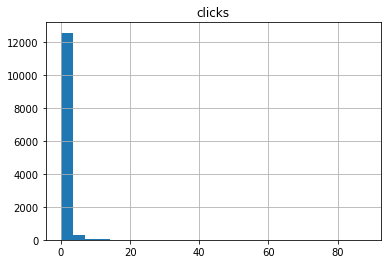

In [8]:
# Cursory look shows distribution to be Poisson. 
df1.hist(column='clicks',bins=25)

In [9]:
# Contingency table shows lots of 'zero' clicks. I can sense that lots of zeros are due to no ads being clicked at all. 
# This leads to the reasoning of trying zero inflated Poisson model apart from Poisson regression model. 
pd.crosstab(index=df1['clicks'],columns="count")

col_0,count
clicks,
0.0,10212
1.0,1670
2.0,475
3.0,233
4.0,135
5.0,85
6.0,58
7.0,24
8.0,27


In [10]:
# Since ratio of variance to mean >1, modeling with Poisson distribution may not be viable. 
# I will also try with Zero-inflated Negative Binomial Regression which is meant for Overdispersed data.  
df1['clicks'].var()/df1['clicks'].mean()

7.449331531344274

In [11]:
# Q1
(df1['clicks']*df1['rpc']).sum()/df1['impressions'].sum()*1000

6.279913707628529

In [12]:
# Creating additional column here. 
df1['rpm'] = df1['clicks']*df1['rpc']/df1['impressions']*1000
df1.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,url,broker,position,impressions,clicks,rpc,rpm
0,/articles/01/050901.asp,Ally Financial,1,111.0,0.0,11,0.0
1,/articles/01/050901.asp,TDAmeritrade,1,19.0,0.0,12,0.0
2,/articles/01/050901.asp,TDAmeritrade,2,59.0,0.0,12,0.0
3,/articles/01/050901.asp,TDAmeritrade,3,77.0,0.0,12,0.0
4,/articles/01/050901.asp,Principal Financial,2,32.0,0.0,9,0.0
5,/articles/01/050901.asp,Principal Financial,1,100.0,0.0,9,0.0
6,/articles/01/050901.asp,Principal Financial,3,11.0,0.0,9,0.0
7,/articles/01/050901.asp,Trade Station,3,34.0,0.0,12,0.0
8,/articles/01/050901.asp,Trade Station,2,45.0,0.0,12,0.0
9,/articles/01/050901.asp,Trade Station,1,25.0,0.0,12,0.0


In [13]:
df_p = pd.read_json('content_properties.json')
df_p.head(5)

,body_text,channel,content_type,subchannel,title,url,word_count
0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,/articles/01/050901.asp,1283
1,Maintenance margin is the minimum amount of eq...,Financial Advisor,Term,FA Relevant,Maintenance Margin,/terms/m/maintenancemargin.asp,773
2,Main street is a colloquial term used to refer...,Insights,Term,Buzz & Trending,Main Street,/terms/m/mainstreet.asp,486
3,Magna cum laude is a term used by educational ...,Personal Finance,Term,Career / Compensation,Magna Cum Laude,/terms/m/magna-cum-laude.asp,413
4,A margin account is a brokerage account in whi...,Investing,Term,Financial Analysis,Margin Account,/terms/m/marginaccount.asp,521


In [14]:
# Drop NaN values as its only 3 entries. 
df_p_a = df_p[df_p.isnull().any(axis=1)]
df_p_a

,body_text,channel,content_type,subchannel,title,url,word_count
37,Operating income is an accounting figure that ...,None,Term,Financial Analysis,Operating Income,/terms/o/operatingincome.asp,385
112,An income statement is a financial statement t...,None,Term,Financial Analysis,Income Statement,/terms/i/incomestatement.asp,551
445,Short selling and put options are essentially ...,None,Article,None,Difference Between Short Selling And Put Options,/articles/trading/092613/difference-between-sh...,2163


In [15]:
df_p1 = df_p.dropna()
print(df_p1.count())
print('\n')
print(df1.count())

body_text       726
channel         726
content_type    726
subchannel      726
title           726
url             726
word_count      726
dtype: int64


url            13022
broker         13022
position       13022
impressions    13022
clicks         13022
rpc            13022
rpm            13022
dtype: int64


In [16]:
df_main = pd.merge(df1,df_p1, on='url',how='outer')
print(df_main.count())

print('\n')

#Main dataset has missings which will be dropped as they are < 1% of the main dataset.
print(df_main[df_main.isnull().any(axis=1)].count())

print('\n')

df_main1 = df_main.dropna()
print(df_main1.count())

url             13025
broker          13022
position        13022
impressions     13022
clicks          13022
rpc             13022
rpm             13022
body_text       12917
channel         12917
content_type    12917
subchannel      12917
title           12917
word_count      12917
dtype: int64


url             111
broker          108
position        108
impressions     108
clicks          108
rpc             108
rpm             108
body_text         3
channel           3
content_type      3
subchannel        3
title             3
word_count        3
dtype: int64


url             12914
broker          12914
position        12914
impressions     12914
clicks          12914
rpc             12914
rpm             12914
body_text       12914
channel         12914
content_type    12914
subchannel      12914
title           12914
word_count      12914
dtype: int64


In [17]:
# Final check to see if NaN are present or not. 
df_main1[df_main1.isnull().any(axis=1)]

,url,broker,position,impressions,clicks,rpc,rpm,body_text,channel,content_type,subchannel,title,word_count


In [18]:
df_main1.head(20)

,url,broker,position,impressions,clicks,rpc,rpm,body_text,channel,content_type,subchannel,title,word_count
0,/articles/01/050901.asp,Ally Financial,1.0,111.0,0.0,11.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
1,/articles/01/050901.asp,TDAmeritrade,1.0,19.0,0.0,12.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
2,/articles/01/050901.asp,TDAmeritrade,2.0,59.0,0.0,12.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
3,/articles/01/050901.asp,TDAmeritrade,3.0,77.0,0.0,12.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
4,/articles/01/050901.asp,Principal Financial,2.0,32.0,0.0,9.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
5,/articles/01/050901.asp,Principal Financial,1.0,100.0,0.0,9.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
6,/articles/01/050901.asp,Principal Financial,3.0,11.0,0.0,9.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
7,/articles/01/050901.asp,Trade Station,3.0,34.0,0.0,12.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
8,/articles/01/050901.asp,Trade Station,2.0,45.0,0.0,12.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
9,/articles/01/050901.asp,Trade Station,1.0,25.0,0.0,12.0,0.0,"Terms like "" dawn raid ,"""" poison pill ,""and ""...",Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0


In [19]:
df_main1_gp = df_main1.groupby( [ 'url'] )['clicks','impressions'].agg(np.sum)
df_main1_gp.head(5)

,clicks,impressions
url,,
/articles/01/050901.asp,0.0,1018.0
/articles/01/071801.asp,5.0,8734.0
/articles/01/082201.asp,3.0,8140.0
/articles/02/062602.asp,0.0,1098.0
/articles/02/120402.asp,0.0,1035.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B71A630>]],
      dtype=object)

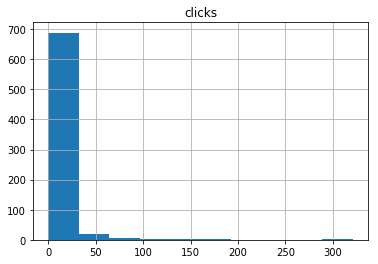

In [20]:
df_main1_gp.hist(column='clicks',bins=10)


In [21]:
pd.crosstab(index=df_main1_gp['clicks'],columns="count")

col_0,count
clicks,
0.0,169
1.0,87
2.0,65
3.0,46
4.0,46
5.0,33
6.0,32
7.0,23
8.0,30


In [22]:
df_main1_gp['clicks'].var()/df_main1_gp['clicks'].mean()
# Over-dispersed data at url level also.

49.12723739887447

In [23]:
df_main1.count()

url             12914
broker          12914
position        12914
impressions     12914
clicks          12914
rpc             12914
rpm             12914
body_text       12914
channel         12914
content_type    12914
subchannel      12914
title           12914
word_count      12914
dtype: int64

In [24]:
df_main1 = df_main1.drop('body_text',1)

In [25]:
df_main1.head(3)

,url,broker,position,impressions,clicks,rpc,rpm,channel,content_type,subchannel,title,word_count
0,/articles/01/050901.asp,Ally Financial,1.0,111.0,0.0,11.0,0.0,Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
1,/articles/01/050901.asp,TDAmeritrade,1.0,19.0,0.0,12.0,0.0,Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0
2,/articles/01/050901.asp,TDAmeritrade,2.0,59.0,0.0,12.0,0.0,Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,1283.0


In [26]:
df_main1.to_csv('C:\Data Science\Dotdash DS Challenge\Dotdash DS Challenge\df_main1.csv')

In [27]:
formula = 'clicks ~ url + word_count + C(broker) + C(channel) + C(position) + C(subchannel) + C(title) + C(content_type)'
lm = ols(formula, df_main1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     11.15
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        05:14:32   Log-Likelihood:                -23707.
No. Observations:               12914   AIC:                         4.887e+04
Df Residuals:                   12184   BIC:                         5.432e+04
Df Model:                         729                                         
Covariance Type:            nonrobust                                         
                                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [28]:
# Looking for interactions between variables. 
formula = 'clicks ~ C(broker)*C(position) + C(channel) + C(subchannel) + C(title) + C(content_type)'
df_main1_anova=ols(formula, data=df_main1).fit() #Specify C for Categorical
print(sm.stats.anova_lm(df_main1_anova, typ=2))

print('\n')

# Seems like Broker and Position shows some interaction.

                             sum_sq       df           F         PR(>F)
C(broker)               1208.366810      5.0  105.207018  4.499139e-109
C(position)              390.945705      2.0   85.094674   1.994196e-37
C(channel)               477.221525     11.0   18.886143   4.083387e-38
C(subchannel)           4608.995401     58.0   34.593477   0.000000e+00
C(title)               20181.643849    721.0   12.185327   0.000000e+00
C(content_type)            3.741666      2.0    0.814425   4.429182e-01
C(broker):C(position)   1756.960561     10.0   76.485294  5.914235e-153
Residual               27967.461022  12175.0         NaN            NaN




In [29]:
formula = 'clicks ~ C(broker) + C(position) + C(channel) + C(subchannel)*C(content_type) + C(title) '
df_main1_anova=ols(formula, data=df_main1).fit() #Specify C for Categorical
print(sm.stats.anova_lm(df_main1_anova, typ=2))

print('\n')
# Interaction between subchannel and content_type is significant.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 58, but rank is 45
  'rank is %d' % (J, J_), ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


                                     sum_sq       df          F         PR(>F)
C(broker)                       1208.366810      5.0  99.069713  1.021560e-102
C(position)                      390.945705      2.0  80.130633   2.670386e-35
C(channel)                       181.024569     11.0   6.746165   2.098049e-11
C(subchannel)                   4452.106759     58.0  31.466591  1.035266e-251
C(content_type)                    8.571803      2.0   1.756929   1.850328e-01
C(title)                       19024.163816    721.0  10.816392   0.000000e+00
C(subchannel):C(content_type)   3272.601540    116.0  11.565043  1.278572e-121
Residual                       29724.421583  12185.0        NaN            NaN




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 116, but rank is 70
  'rank is %d' % (J, J_), ValueWarning)


In [30]:
formula = 'clicks ~ C(broker) + C(position) + C(channel) + C(subchannel) + C(title)*C(content_type)'
df_main1_anova=ols(formula, data=df_main1).fit() #Specify C for Categorical
print(sm.stats.anova_lm(df_main1_anova, typ=2))

print('\n')
# Interaction between title and content_type seems significant.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 721, but rank is 121
  'rank is %d' % (J, J_), ValueWarning)


                                sum_sq       df          F         PR(>F)
C(broker)                  1208.366810      5.0  99.069713  1.021560e-102
C(position)                 390.945705      2.0  80.130633   2.670386e-35
C(channel)                  240.919713     11.0   8.978252   3.703600e-16
C(subchannel)              3166.838552     58.0  22.382575  1.613834e-220
C(title)                  23948.361798    721.0  13.616098  6.155142e-247
C(content_type)              -0.000219      2.0  -0.000045   1.000000e+00
C(title):C(content_type)  19893.122054   1442.0   5.655224  2.229012e-289
Residual                  29724.421583  12185.0        NaN            NaN




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1442, but rank is 522
  'rank is %d' % (J, J_), ValueWarning)


In [31]:
formula = 'clicks ~ C(broker) + C(position) + C(channel)*C(subchannel) + C(title) + C(content_type)'
df_main1_anova=ols(formula, data=df_main1).fit() #Specify C for Categorical
print(sm.stats.anova_lm(df_main1_anova, typ=2))

# Interaction between subchannel and channel is also seen.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 58, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


                                sum_sq       df           F         PR(>F)
C(broker)                  1208.366810      5.0   99.069713  1.021560e-102
C(position)                 390.945705      2.0   80.130633   2.670386e-35
C(channel)                  215.262411     11.0    8.022092   4.628597e-03
C(subchannel)             32522.972341     58.0  229.865798   1.017964e-98
C(title)                  19025.881698    721.0   10.817369   0.000000e+00
C(content_type)               4.089379      2.0    0.838184   4.325201e-01
C(channel):C(subchannel)  26063.158535    638.0   16.746285  3.184190e-156
Residual                  29724.421583  12185.0         NaN            NaN


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 638, but rank is 57
  'rank is %d' % (J, J_), ValueWarning)


In [32]:
# Binning of word_count
df_main1['word_count'].describe()

count    12914.000000
mean       846.881834
std        642.759554
min        157.000000
25%        447.000000
50%        592.000000
75%       1085.000000
max       7109.000000
Name: word_count, dtype: float64

In [33]:
bins = [0,250,500,750,1000,1250,1500,1750,2000]
labels = [1,2,3,4,5,6,7,8]
df_main1['word_count_bin'] = pd.cut(df_main1['word_count'], bins=bins,labels=labels)

In [34]:
df_main2 = df_main1.drop('word_count',1)

In [35]:
df_main2.head(3)

,url,broker,position,impressions,clicks,rpc,rpm,channel,content_type,subchannel,title,word_count_bin
0,/articles/01/050901.asp,Ally Financial,1.0,111.0,0.0,11.0,0.0,Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,6
1,/articles/01/050901.asp,TDAmeritrade,1.0,19.0,0.0,12.0,0.0,Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,6
2,/articles/01/050901.asp,TDAmeritrade,2.0,59.0,0.0,12.0,0.0,Investing,Article,Financial Analysis,Mergers And Acquisitions: Understanding Takeovers,6


In [36]:
formula = """clicks ~ C(subchannel) + C(content_type) + C(broker) + C(position)+ word_count"""
model = smf.glm(formula = formula, data=df_main1, family=sm.families.Poisson(),offset = np.log(df_main1.impressions))
result = model.fit()
print(result.summary())

# The ratio "Pearson chi2/Df Residuals" > 1 (Should be ~1)
# The ratio Deviance/Df model >>1 (Should be ~1)
# The above two criterion are not satisfactory for the present model.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 clicks   No. Observations:                12914
Model:                            GLM   Df Residuals:                    12845
Model Family:                 Poisson   Df Model:                           68
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9596.4
Date:                Tue, 22 Jan 2019   Deviance:                       12334.
Time:                        05:16:20   Pearson chi2:                 2.22e+04
No. Iterations:                    24   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -7.3224      0.177   

In [37]:
# Negative Binomial Regression is attempted here.
formula = """clicks ~ C(subchannel) + C(broker) + C(content_type)  + C(position)+ word_count"""
# alpha is hyperparameter here. 
model = smf.glm(formula = formula, data=df_main1, family=sm.families.NegativeBinomial(alpha=2),offset = np.log(df_main1.impressions))
result = model.fit()
print(result.summary())

# Pearson chi2/Df residuals ~ 1
# Deviance is less than Poisson but still >>1
# Model seems to be better than the Poisson tried previously. 
# Zero inflated Negative Binomial should also be tried but Python statsmodel doesn`t support that distribution. 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 clicks   No. Observations:                12914
Model:                            GLM   Df Residuals:                    12845
Model Family:        NegativeBinomial   Df Model:                           68
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8659.5
Date:                Tue, 22 Jan 2019   Deviance:                       5663.2
Time:                        05:16:27   Pearson chi2:                 1.23e+04
No. Iterations:                    24   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -7.3606      0.243   

In [38]:
# Interaction between subchannel and broker is explored. 
formula = """clicks ~ C(subchannel)*C(broker) + C(content_type) + C(position)+ word_count"""
# alpha is hyperparameter here. 
model = smf.glm(formula = formula, data=df_main1, family=sm.families.NegativeBinomial(alpha=2),offset = np.log(df_main1.impressions))
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 clicks   No. Observations:                12914
Model:                            GLM   Df Residuals:                    12555
Model Family:        NegativeBinomial   Df Model:                          358
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8541.8
Date:                Tue, 22 Jan 2019   Deviance:                       5427.9
Time:                        05:16:43   Pearson chi2:                 1.11e+04
No. Iterations:                    25   Covariance Type:             nonrobust
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
I

In [39]:
# Interaction between channel and broker is explored.
formula = """clicks ~ C(channel)*C(broker) + C(position) + C(content_type) + word_count"""
# alpha is hyperparameter here. 
model = smf.glm(formula = formula, data=df_main1, family=sm.families.NegativeBinomial(alpha=2),offset = np.log(df_main1.impressions))
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 clicks   No. Observations:                12914
Model:                            GLM   Df Residuals:                    12837
Model Family:        NegativeBinomial   Df Model:                           76
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9050.0
Date:                Tue, 22 Jan 2019   Deviance:                       6444.3
Time:                        05:16:52   Pearson chi2:                 1.32e+04
No. Iterations:                    24   Covariance Type:             nonrobust
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                

In [46]:
# Interaction between content_type and channel is explored.
formula = """clicks ~ C(content_type)*C(channel) + C(broker) + C(position) + word_count"""
# alpha is hyperparameter here. 
model = smf.glm(formula = formula, data=df_main1, family=sm.families.NegativeBinomial(alpha=2),offset = np.log(df_main1.impressions))
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 clicks   No. Observations:                12914
Model:                            GLM   Df Residuals:                    12874
Model Family:        NegativeBinomial   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8969.6
Date:                Tue, 22 Jan 2019   Deviance:                       6283.6
Time:                        05:47:03   Pearson chi2:                 1.24e+04
No. Iterations:                    22   Covariance Type:             nonrobust
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                  

In [41]:
# 3 way interaction between content_type, channel and broker is explored here. 
formula = """clicks ~ C(content_type)*C(channel)*C(broker) + C(position) +  word_count"""
# alpha is hyperparameter here. 
model = smf.glm(formula = formula, data=df_main1, family=sm.families.NegativeBinomial(alpha=2),offset = np.log(df_main1.impressions))
result = model.fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 clicks   No. Observations:                12914
Model:                            GLM   Df Residuals:                    12719
Model Family:        NegativeBinomial   Df Model:                          194
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8897.6
Date:                Tue, 22 Jan 2019   Deviance:                       6139.5
Time:                        05:35:07   Pearson chi2:                 1.18e+04
No. Iterations:                    25   Covariance Type:             nonrobust
                                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Interaction between title and channel is explored.
formula = """clicks ~ C(title)*C(channel) + C(content_type) + C(broker) + C(position) + word_count"""
# alpha is hyperparameter here. 
model = smf.glm(formula = formula, data=df_main1, family=sm.families.NegativeBinomial(alpha=2),offset = np.log(df_main1.impressions))
result = model.fit()
print(result.summary())

In [42]:
(df_main1['clicks']*df_main1['rpc']).sum()/df_main1['impressions'].sum()*1000

6.320772534672286